# Decomposição de uma série temporal

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
base = pd.read_csv('./dados/AirPassengers.csv')
date_parser = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('./dados/AirPassengers.csv', date_parser=date_parser, parse_dates=['Month'], index_col='Month')
base.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


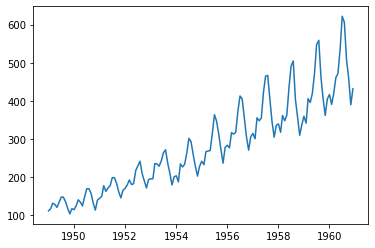

In [8]:
ts = base['#Passengers']
plt.plot(ts)

Vamos agora decompor a Série Temporal

In [10]:
decomp = seasonal_decompose(ts)

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: trend, dtype: float64

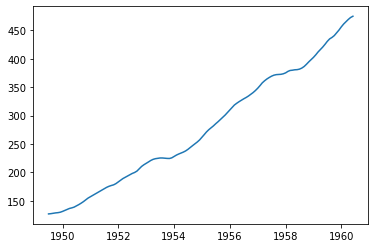

In [14]:
trend = decomp.trend
plt.plot(trend)

Esses valores NaN são por conta da forma que a biblioteca aplica na sazonalidade

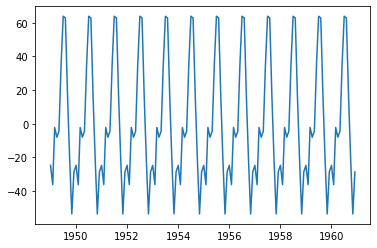

In [17]:
seazonal = decomp.seasonal
seazonal.head()
plt.plot(seazonal)

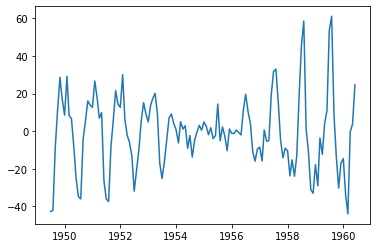

In [22]:
# Erro, ou o aleatório
random_or_error = decomp.resid
plt.plot(random_or_error)

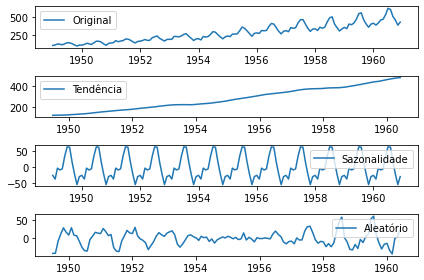

In [26]:
plt.subplot(4, 1, 1)

plt.plot(ts, label='Original')
plt.legend(loc='best')

# Visualizaçõa de Tendência
plt.subplot(4, 1, 2)
plt.plot(trend, label='Tendência')
plt.legend(loc='best')

# Visualização de sazonalidade
plt.subplot(4, 1, 3)
plt.plot(seazonal, label='Sazonalidade')
plt.legend(loc='best')

# Visualização aleatória
plt.subplot(4, 1, 4)
plt.plot(random_or_error, label='Aleatório')
plt.legend(loc='best')

plt.tight_layout()